In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import janssen as jns

In [2]:
wavelength = 500e-9
dx = 1e-6
grid_size = (256, 256)

In [3]:
def plot_optical_wavefront(wf, title):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    field = wf.field
    amplitude = jnp.abs(field)
    phase = jnp.angle(field)
    intensity = amplitude ** 2
    
    axes[0].imshow(amplitude, cmap="viridis")
    axes[0].axis("off")
    axes[0].set_title("Amplitude")
    
    axes[1].imshow(phase, cmap="twilight", vmin=-jnp.pi, vmax=jnp.pi)
    axes[1].axis("off")
    axes[1].set_title("Phase")
    
    axes[2].imshow(intensity, cmap="inferno")
    axes[2].axis("off")
    axes[2].set_title("Intensity")
    
    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


def plot_propagating_wavefront(beam, title, z_indices=[0, 12, 25, 37, 49]):
    fig, axes = plt.subplots(3, len(z_indices), figsize=(15, 9))
    
    for col, z_idx in enumerate(z_indices):
        field = beam.field[z_idx]
        amplitude = jnp.abs(field)
        phase = jnp.angle(field)
        intensity = amplitude ** 2
        
        axes[0, col].imshow(amplitude, cmap="viridis")
        axes[0, col].axis("off")
        axes[0, col].set_title(f"z = {beam.z_positions[z_idx]*1e3:.1f} mm")
        
        axes[1, col].imshow(phase, cmap="twilight", vmin=-jnp.pi, vmax=jnp.pi)
        axes[1, col].axis("off")
        
        axes[2, col].imshow(intensity, cmap="inferno")
        axes[2, col].axis("off")
    
    axes[0, 0].set_ylabel("Amplitude", fontsize=12)
    axes[1, 0].set_ylabel("Phase", fontsize=12)
    axes[2, 0].set_ylabel("Intensity", fontsize=12)
    
    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

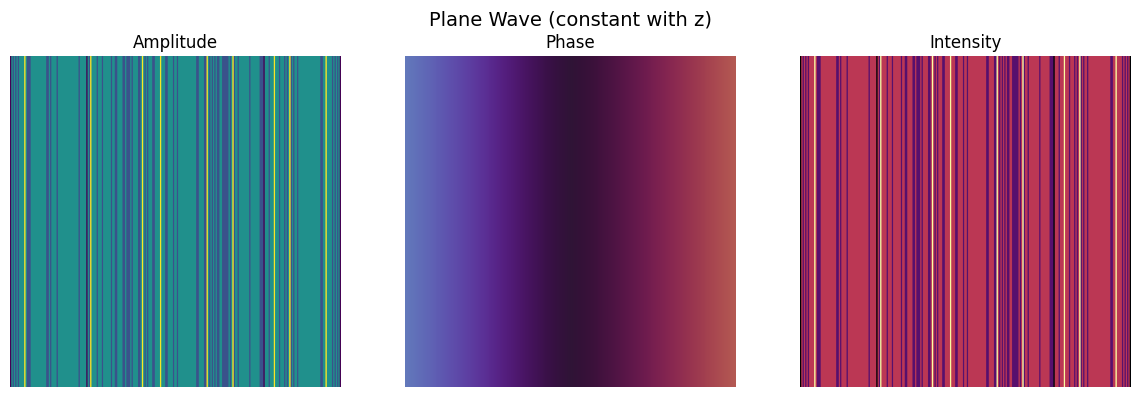

In [4]:
plane = jns.models.plane_wave(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    tilt_x=0.001,
)
plot_optical_wavefront(plane, "Plane Wave (constant with z)")

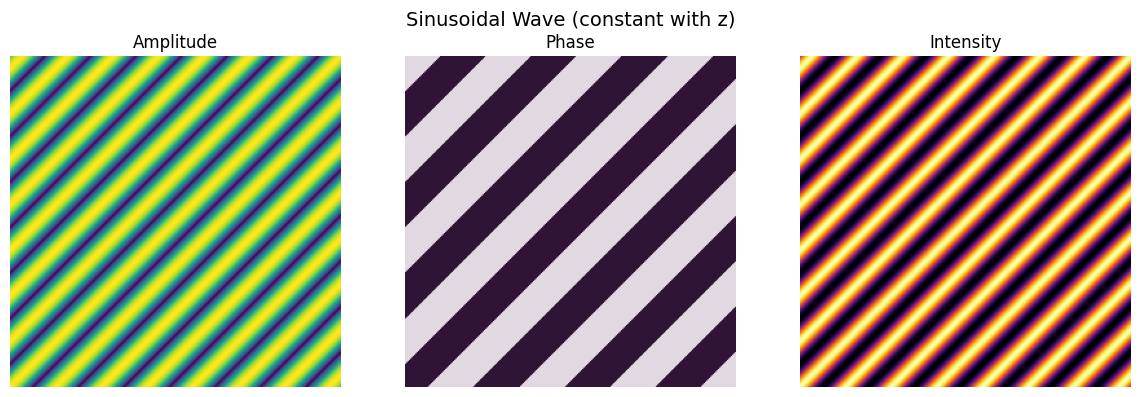

In [5]:
sinusoidal = jns.models.sinusoidal_wave(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    period=50e-6,
    direction=jnp.pi / 4,
)
plot_optical_wavefront(sinusoidal, "Sinusoidal Wave (constant with z)")

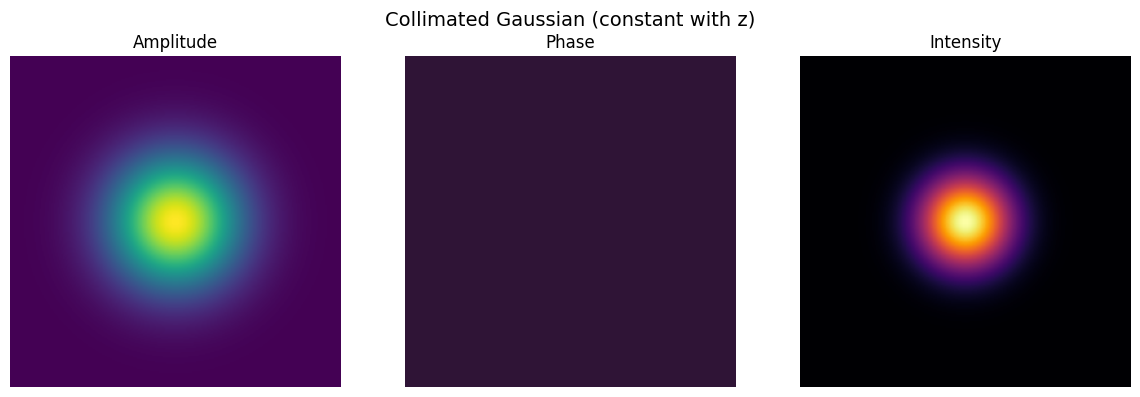

In [6]:
collimated = jns.models.collimated_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
)
plot_optical_wavefront(collimated, "Collimated Gaussian (constant with z)")

In [ ]:
converging = jns.models.converging_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
    focus_distance=2e-3,
)
plot_optical_wavefront(converging, "Converging Gaussian (initial condition)")

In [ ]:
diverging = jns.models.diverging_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
    source_distance=2e-3,
)
plot_optical_wavefront(diverging, "Diverging Gaussian (initial condition)")

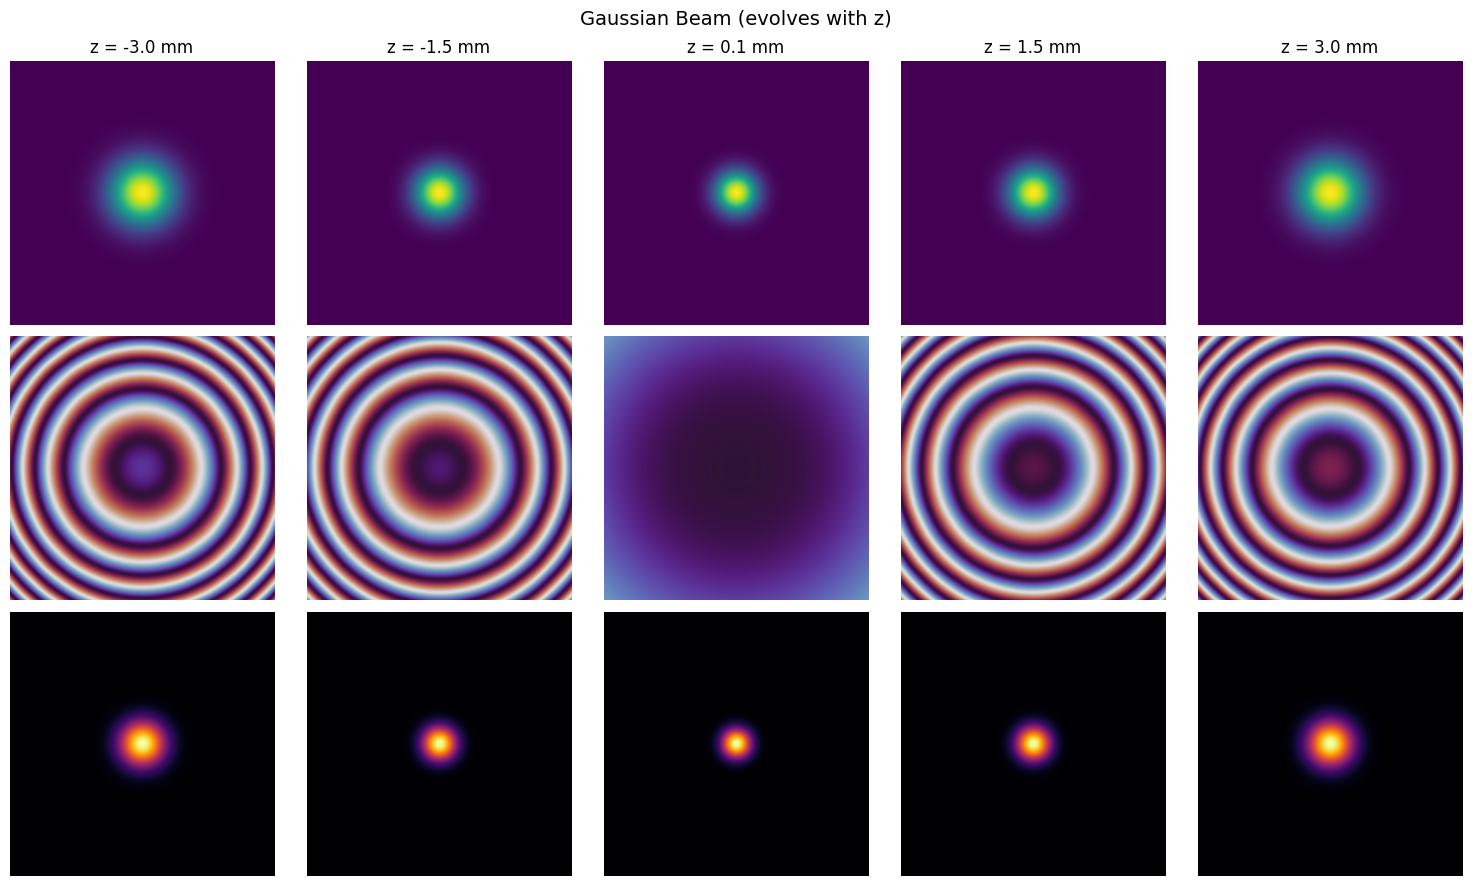

In [ ]:
z_gaussian = jnp.linspace(-3e-3, 3e-3, 50)
gaussian = jns.models.propagate_beam(
    beam_type="gaussian_beam",
    z_positions=z_gaussian,
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist_0=20e-6,
)
plot_propagating_wavefront(gaussian, "Gaussian Beam (evolves with z)")

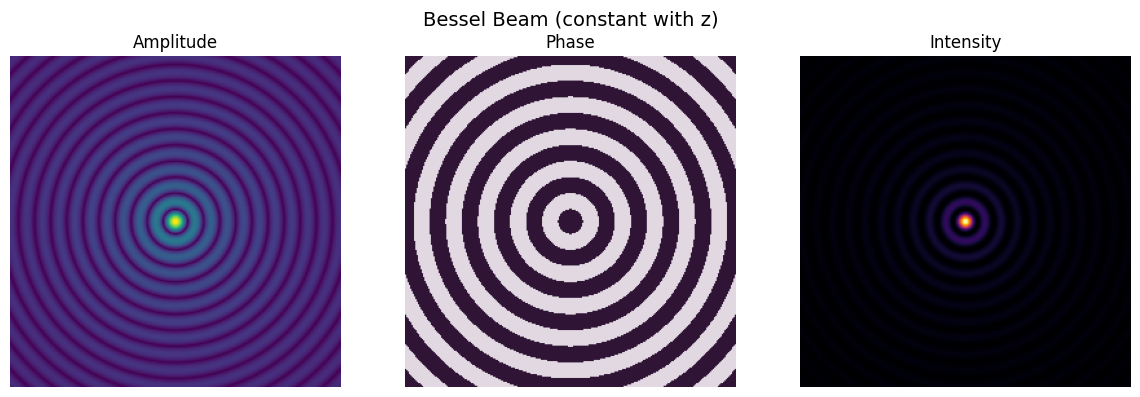

In [ ]:
bessel = jns.models.bessel_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    cone_angle=0.02,
)
plot_optical_wavefront(bessel, "Bessel Beam (constant with z)")

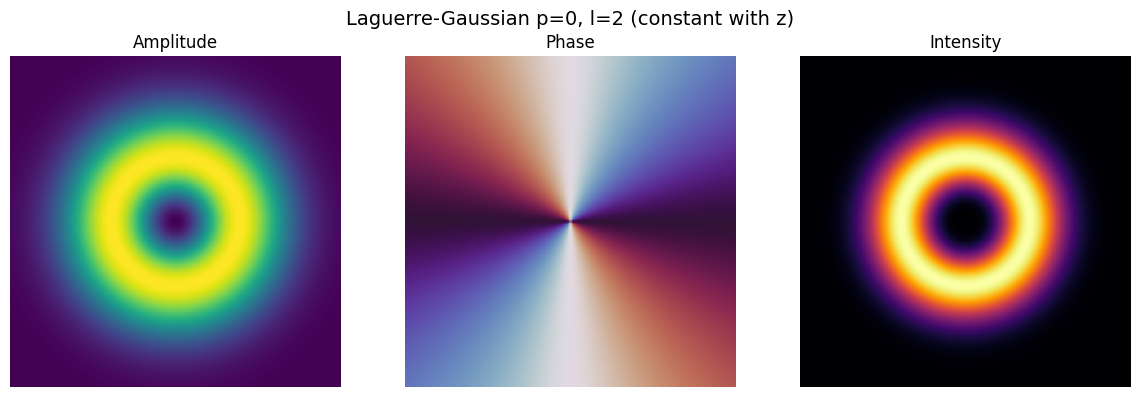

In [ ]:
laguerre = jns.models.laguerre_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
    p=0,
    l=2,
)
plot_optical_wavefront(laguerre, "Laguerre-Gaussian p=0, l=2 (constant with z)")

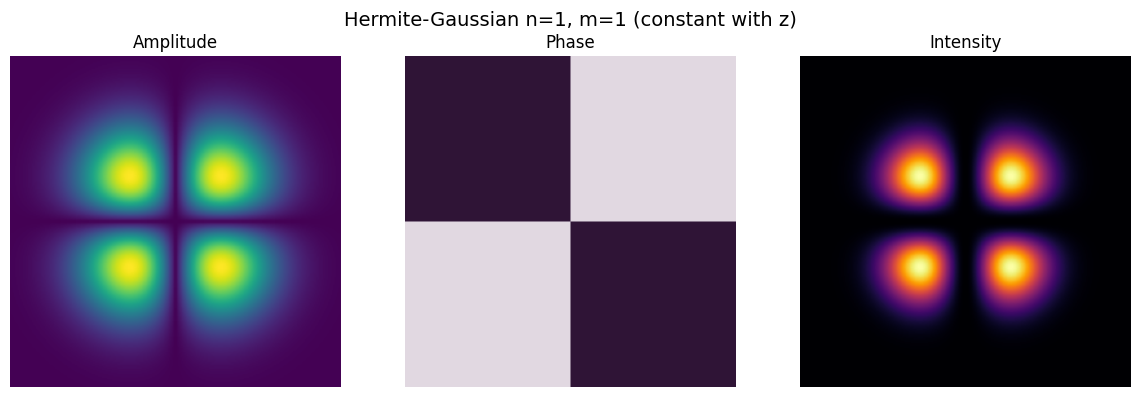

In [ ]:
hermite = jns.models.hermite_gaussian(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    waist=50e-6,
    n=1,
    m=1,
)
plot_optical_wavefront(hermite, "Hermite-Gaussian n=1, m=1 (constant with z)")